In [7]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import torch

import gym

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from baseline_policies.threshold import Threshold

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching

In [8]:
%config InlineBackend.figure_format = "retina"
sns.set()

# Without breaks

In [4]:
env = ContinuousTeaching(t_max=100, alpha=0.2, tau=0.9)

## Using A2C

In [4]:
model = A2C(env, seed=123)

iterations = env.t_max * 1000
check_freq = env.t_max

with ProgressBarCallback(env, check_freq) as callback:
    model.learn(iterations, callback=callback)

0it [00:00, ?it/s]

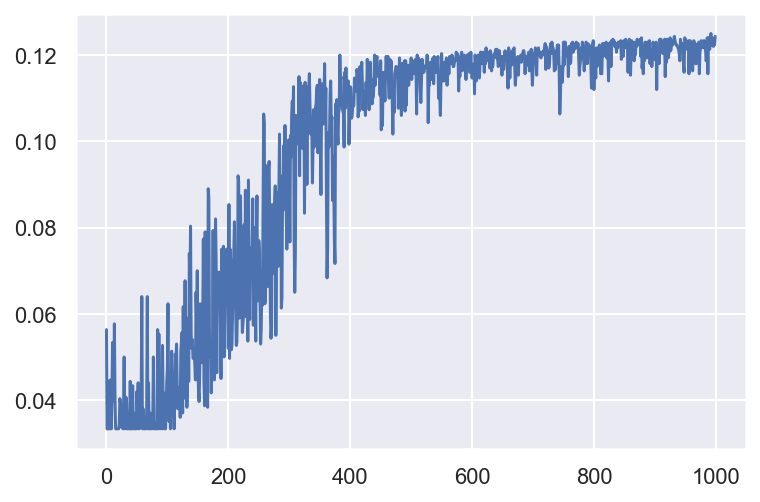

In [11]:
plt.plot([np.mean(r) for r in callback.hist_rewards]);

In [12]:
def run_one_episode(env, policy):
    rewards = []
    actions = []

    obs = env.reset()
    while True:
        action = policy.act(obs)
        obs, reward, done, info = env.step(action)

        rewards.append(reward)
        actions.append(action)

        if done:
            obs = env.reset()
            break
            
    return rewards, actions

In [13]:
rewards, actions = run_one_episode(env=env, policy=model)

In [14]:
print("sum rewards:", np.sum(rewards))

sum rewards: 12.466666666666663


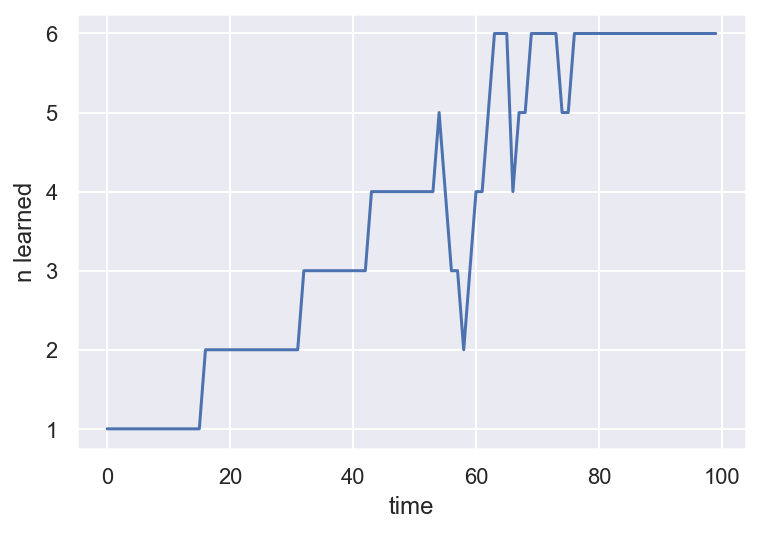

In [15]:
n_learned = np.array(rewards)*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

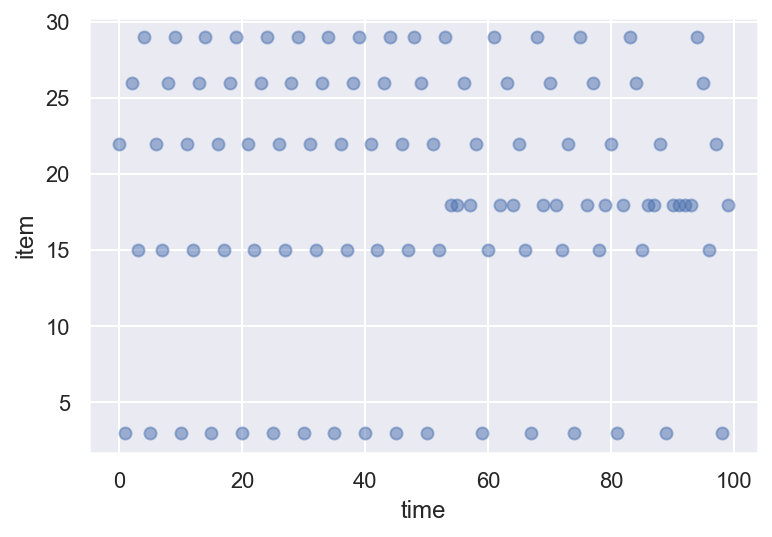

In [16]:
fig, ax = plt.subplots()
ax.scatter(np.arange(env.t_max), actions, alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("item");

In [17]:
# Test save and load
model.save("bkp/a2c_demo.p")
model = model.load("bkp/a2c_demo.p")

## Using Threshold (myopic)

In [5]:
obs = env.reset()
policy = Threshold(env=env, tau=0.9)
rewards = []
actions = []
while True:
    action = policy.act(obs)
    obs, reward, done, _ = env.step(action)
    rewards.append(reward)
    actions.append(action)
    if done:
        break

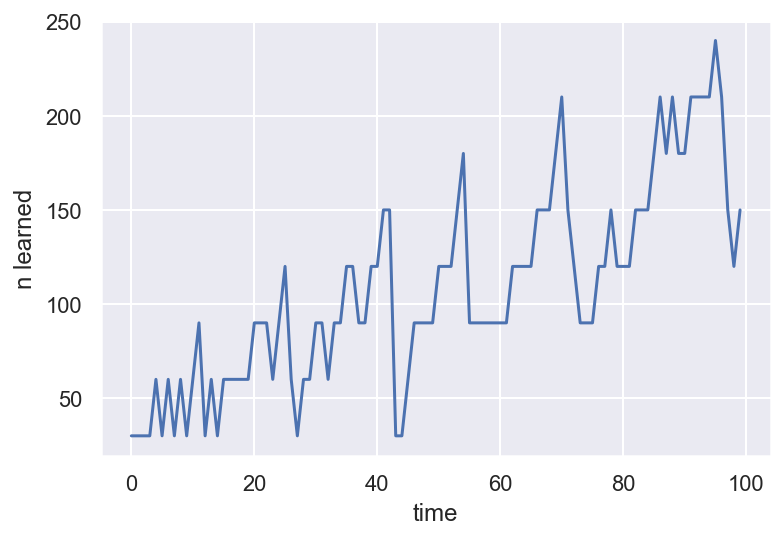

In [9]:
n_learned = np.array(rewards)*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

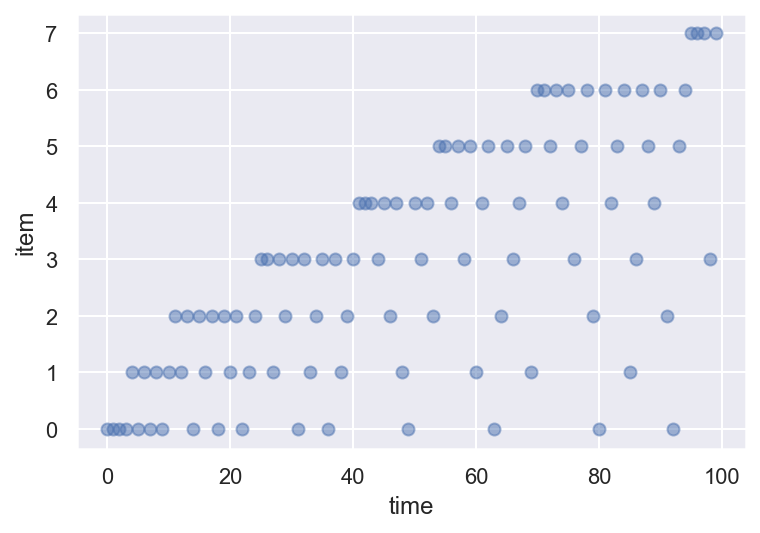

In [10]:
fig, ax = plt.subplots()
ax.scatter(np.arange(env.t_max), actions, alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("item");

# With breaks

In [9]:
env = DiscontinuousTeaching(alpha=0.2, beta=0.1, tau=0.9, 
                            break_length=1000, time_per_iter=1, 
                            n_iter_per_session=10)

## Using Threshold (myopic)

In [10]:
obs = env.reset()
policy = Threshold(tau=0.9, env=env)
rewards = []
actions = []
while True:
    action = policy.act(obs)
    obs, reward, done, _ = env.step(action)
    rewards.append(reward)
    actions.append(action)
    if done:
        break

In [11]:
rewards = np.array(rewards)*env.n_item

(107.0, 0.797739862918288)

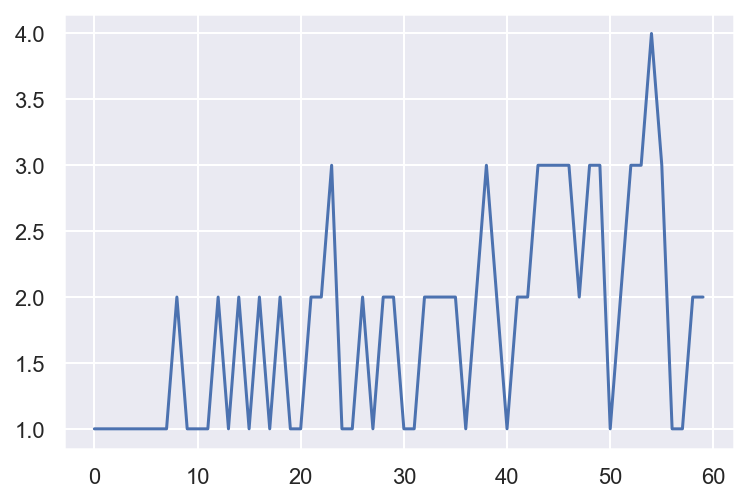

In [12]:
n_learned = np.array(rewards)*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

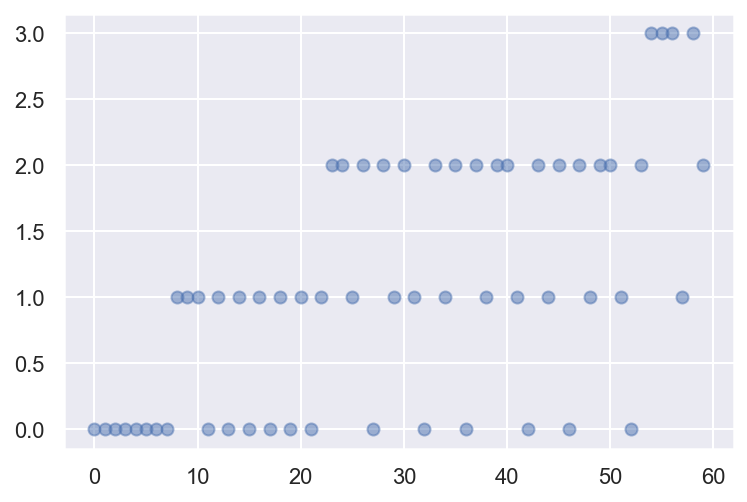

In [14]:
plt.scatter(np.arange(len(actions)), actions, alpha=0.5);

## Using A2C

In [16]:
model = A2C(env, seed=123)

env_t_max = env.n_session*env.n_iter_per_session
iterations = env_t_max * 10000
check_freq = env_t_max

with ProgressBarCallback(env, check_freq) as callback:
    model.learn(iterations, callback=callback)

0it [00:00, ?it/s]

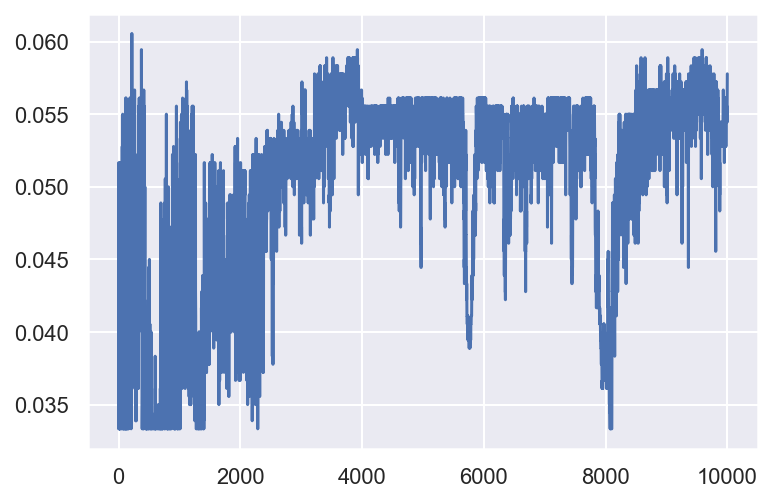

In [18]:
plt.plot([np.mean(r) for r in callback.hist_rewards])

In [17]:
rewards = []
actions = []

obs = env.reset()
while True:
    action = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    
    rewards.append(reward)
    actions.append(action)
    
    if done:
        obs = env.reset()
        break

(232.0, 0.9152048950918041)

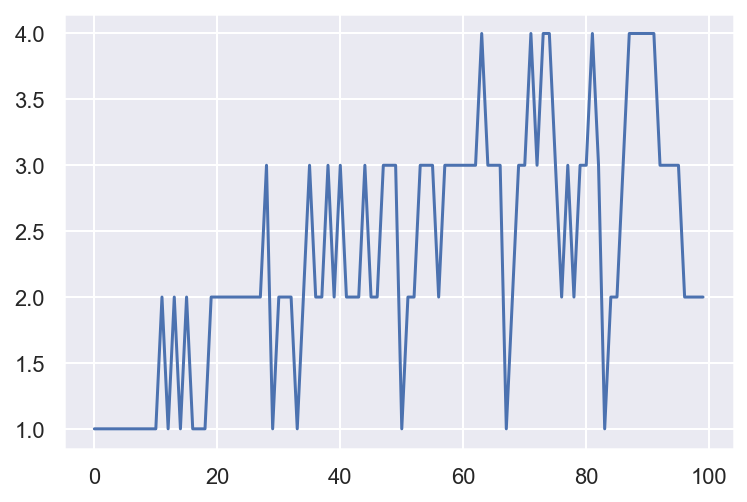

In [59]:
n_learned = np.array(rewards)*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

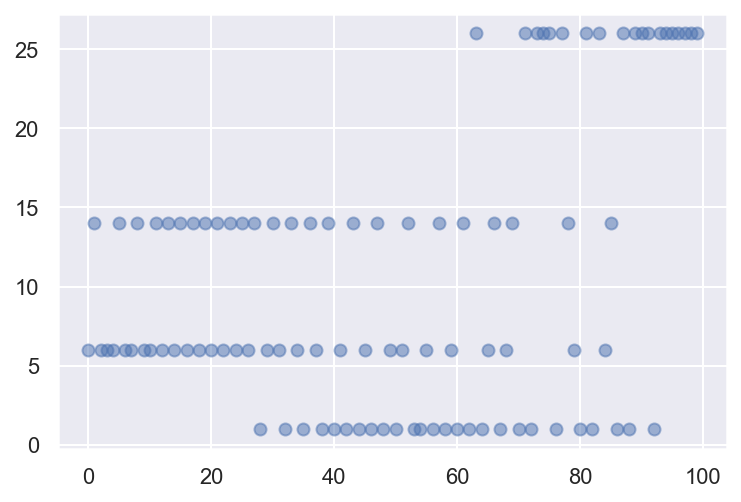

In [60]:
plt.scatter(np.arange(env.t_max), actions, alpha=0.5);